In [200]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import visionloader as vl
import os
import matplotlib as mpl
from matplotlib.patches import Ellipse
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import sta_utils as su


analysis_path='/Volumes/SrinDrive/data/sorted/20230314C/chunk1/kilosort2'
sort_algorithm = 'kilosort2'

# # # '/Volumes/test/Rieke Lab Data/20230322C/chunk2/kilosort2'
# with open('/Volumes/SrinDrive/data/sorted/20230322C/chunk2/kilosort2/kilosort2.params','rb') as f:
#     mdic = pickle.load(f)

# Loading Data 
# data_path = '/Volumes/SrinDrive/data/sorted/20230322C/'
# sort_algorithm= 'kilosort2.params'
# chunk= 'chunk2'

print(analysis_path)

# mdic.keys()

/Volumes/SrinDrive/data/sorted/20230314C/chunk1/kilosort2


In [201]:
# Load the vision data.
vcd = vl.load_vision_data(analysis_path, sort_algorithm, include_params = True, include_neurons = True)

# Setup the colormap.
# cmap = mpl.colormaps['viridis']

# cell_ids = [27,31,41]
cell_ids = vcd.get_all_cells_similar_to_type('onp')
# cell_ids = vcd.get_all_cells_of_type('OnM')

# Get the RF fits for each cell.
rf_fits = [vcd.get_stafit_for_cell(cell_id) for cell_id in cell_ids]

# Generate the ellipses.
ells = list()
for cell_count, cell_id in enumerate(cell_ids):
    rf_fit = vcd.get_stafit_for_cell(cell_id)
    
    ells.append(Ellipse(xy=(rf_fit.center_x, rf_fit.center_y),width=rf_fit.std_x*2, height=rf_fit.std_y*2, angle=rf_fit.rot, edgecolor='k', facecolor='#85754d', alpha=0.5))


# Get the PSTH for each cell.
# cell_psth = avg_psth[np.searchsorted(cluster_id, cell_ids),:,:]

# delta_r = np.nanmean(cell_psth[:,:,200:220],axis=2) - np.nanmean(cell_psth[:,:,60:170],axis=2)


# print(mdic['move_frames'][0])
# print(mdic['stop_frames'][0])

# , cell_response, playback_interval=50 (inclue in the plot_mosaic functions for animation)
def plot_mosaic(ells):
    fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=60)
    
    def init(): 
        for e in ells:
            ax.add_patch(e)
            e.set_clip_box(ax.bbox)
            e.set_alpha(1.0)
            e.set_facecolor('green')
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 75)
        return ax
    
    n = list()
    for e in ells:
        n.append(ax.add_patch(e))
    
    # ax.axis('off')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 75)

    # def animate(frame):
    #     [n[i].set_facecolor(cmap(cell_response[i,frame])[:3]) for i in range(len(n))]
    
    # anim = FuncAnimation(fig, animate, init_func=init, frames=220, interval=playback_interval) 
    return fig

# Plot the RF fits for each cell.
# anim = plot_mosaic(ells, cell_psth[:,0,:])
# HTML(anim.to_jshtml())

plot_mosaic(ells)

AssertionError: Analysis folder path /Volumes/SrinDrive/data/sorted/20230314C/chunk1/kilosort2 is not a folder

In [90]:
str_datafile = '/Users/srinidhienaidu/Desktop/Rieke Lab Data/20230314C_kilosort2_data000_data001_data002_data003_data004__dimflash.p'

with open(str_datafile, "rb") as f:
   d_data = pickle.load(f)

   

In [130]:
unique_params = d_data['unique_params']
spike_dict = d_data['spike_dict']
# cluster_id = vcd.get_all_cells_similar_to_type('OnP')
cluster_id = list(spike_dict.keys())
print(len(cluster_id))
u_intensity = np.array(unique_params['spotIntensity'])
intensities = d_data['params']['spotIntensity']
cluster_plot = spike_dict[cluster_id[0]]

840


In [131]:
# Making a PSTH 
psth = np.zeros((len(cluster_id),len(u_intensity),cluster_plot.shape[1]))
count=0
for key, value in spike_dict.items():
    for i_count, intensity in enumerate(u_intensity):
        idx = np.argwhere(intensities == intensity).ravel()
        psth[count,i_count,:] = np.nanmean(value[idx,:],axis=0)
    count += 1

[6, 23, 53, 54, 61, 62, 91, 92, 103, 117, 126, 147, 150, 169, 170, 196, 203, 209, 236, 246, 251, 276, 278, 299, 323, 324, 330, 341, 345, 352, 369, 386, 423, 436, 445, 452, 458, 459, 463, 464, 498, 501, 502, 520, 537, 545, 553, 554, 555, 562, 578, 587, 588, 660, 681, 697, 710, 727, 728, 733, 738, 765, 787, 791]


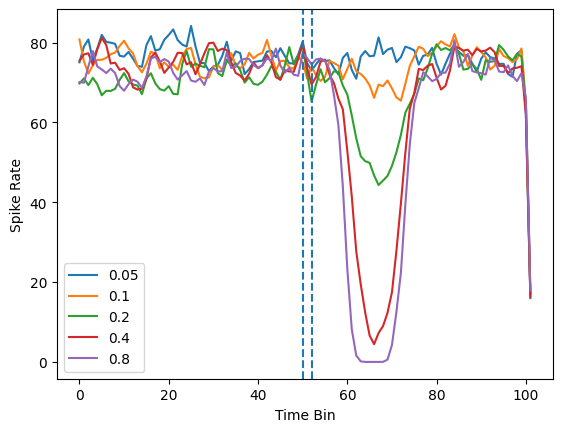

In [198]:
plt.xlabel("Time Bin")
plt.ylabel("Spike Rate")
spec_cell_ids = vcd.get_all_cells_similar_to_type('OnP')
print(spec_cell_ids)

for u_int in range(u_intensity.size):
    # for cell in spec_cell_ids:
    plt.plot(psth[126, u_int, :], label = u_intensity[u_int]);
plt.axvline(50, ls = '--')
plt.axvline(52, ls = '--')
plt.legend()

[4, 9, 15, 21, 194, 218, 243, 250, 422, 603, 637, 686, 691, 692, 702, 706, 715, 716]


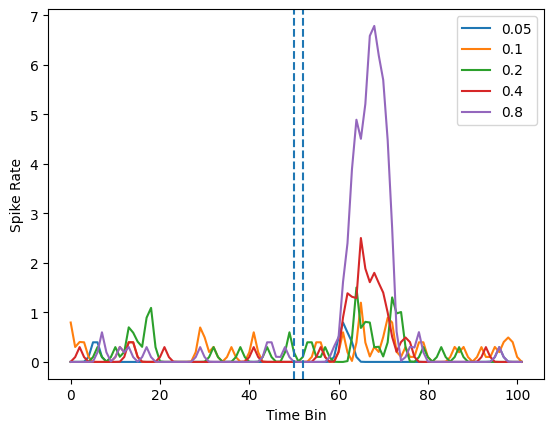

In [185]:
off_cells = vcd.get_all_cells_similar_to_type('Off')
print(off_cells)
for u_int in range(u_intensity.size):
    # for cell in spec_cell_ids:
    plt.plot(psth[21, u_int, :], label = u_intensity[u_int]);

plt.axvline(50, ls = '--')
plt.axvline(52, ls = '--')
plt.xlabel("Time Bin")
plt.ylabel("Spike Rate")
plt.legend()